# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Выпишем дифференциал функции ошибки по $w$:

$$
d_w Q = \dfrac{1}{\ell}  d_w[(y - Xw)^T(y - Xw)] =
$$
$$
= \dfrac{1}{\ell}  d_w[(y - Xw)^T](y - Xw) + (y - Xw)^T d_w[(y - Xw)] =
$$
$$
=  \dfrac{1}{\ell}  d_w[(-Xw)^T](y - Xw) - (y - Xw)^T X \, dw =
$$
$$
= - \dfrac{1}{\ell}  dw^T X^T (y - Xw) - (y - Xw)^T X \, dw = -\dfrac{2}{\ell} (y - Xw)^T X \, dw.
$$

$ * \ dw^T X^T (y - Xw)$ это скаляр, так что его можно транспонировать.

Учитывая, что отрицательный знак означает движение в направлении антиградиента при оптимизации, получим:

$$
\nabla_w Q(w) = \frac{2}{\ell} X^T (Xw - y)
$$



### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:

https://contest.yandex.ru/contest/70588/run-report/124936214/


* **StochasticDescent**:

https://contest.yandex.ru/contest/70588/run-report/124936248/


* **MomentumDescent**:

https://contest.yandex.ru/contest/70588/run-report/124936265/


* **Adam**:

https://contest.yandex.ru/contest/70588/run-report/124936292/


* **LinearRegression**:

https://contest.yandex.ru/contest/70588/run-report/124936775/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('/content/autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
data.shape[0]

241190

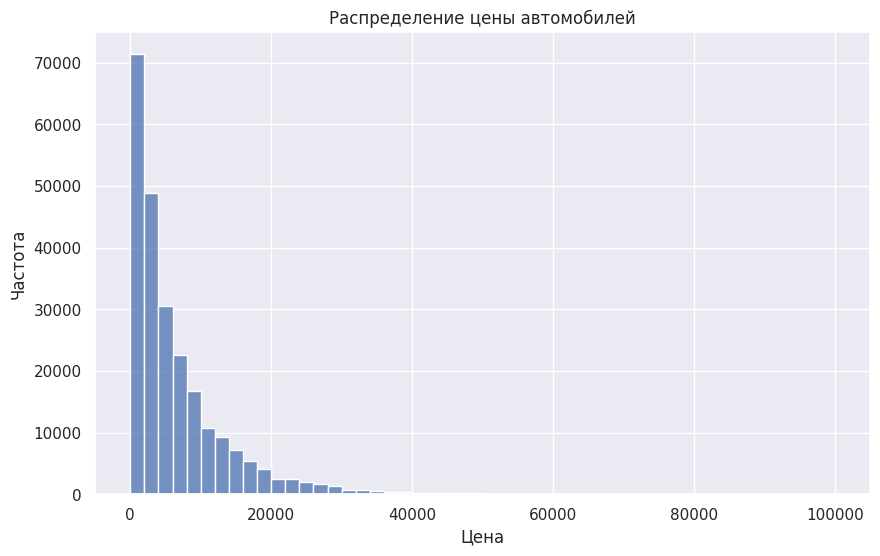

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=False)
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Построим распределение логарифма цены:

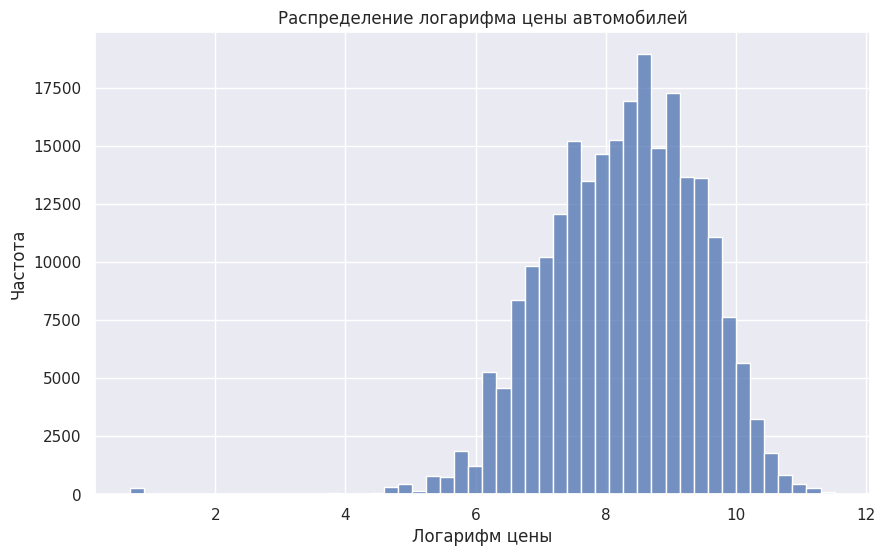

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['price']), bins=50, kde=False)
plt.title('Распределение логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Думаю, что логарифмирование целевой переменной нам может быть полезным, потому что уменьшается влияние выбросов, то есть очень высокие цены будут оказывать меньшее влияние на модель, так как логарифмическое преобразование будет "сжимать" высокие значения.
Еще логарифм цены создает распределение, которое ближе к нормальному и не смещено так сильно влево, как на первом графике.

Теперь удалим выбросы из выборки

In [12]:
data['log_price'] = np.log1p(data['price'])

initial_outliers_count = data[(data['log_price'] <= 4) | (data['price'] > 30000)].shape[0]
print("Количество выбросов перед фильтрацией:", initial_outliers_count)

filtered_data = data[(data['log_price'] >= 4) & (data['price'] <= 30000)]
print("Оставшиеся данные после удаления выбросов:", data.shape[0])

Количество выбросов перед фильтрацией: 5041
Оставшиеся данные после удаления выбросов: 241190


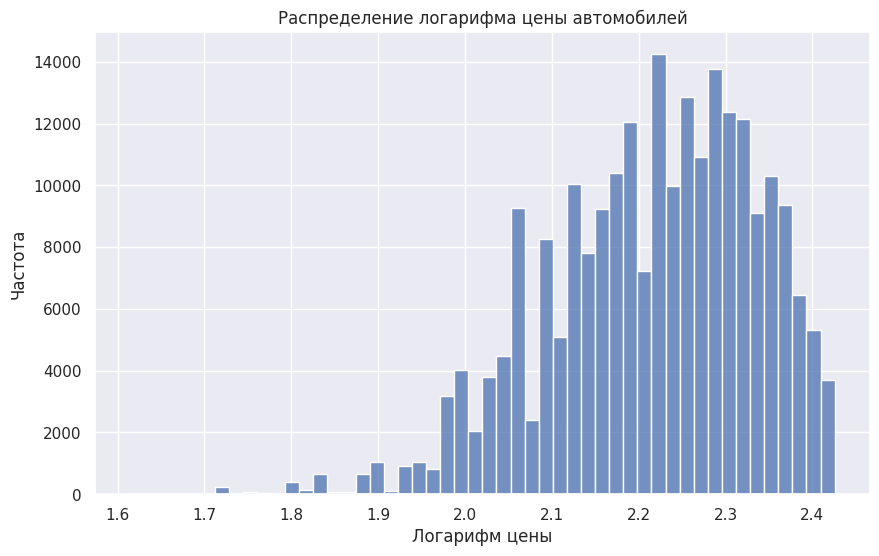

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(filtered_data['log_price']), bins=50, kde=False)
plt.title('Распределение логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Теперь поисследуем данные: сначала проанализируем типы столбцов

In [52]:
print("Типы данных столбцов:")
filtered_data.dtypes

Типы данных столбцов:


,0
brand,object
model,object
vehicleType,object
fuelType,object
notRepairedDamage,int64
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64
log_price,float64


у нас в датасете 3 числовых стобца и 6 строковых

In [51]:
print("Описательные статистики:")
filtered_data.describe()

Описательные статистики:


,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,is_auto_gearbox
count,235679.000000,235679.000000,235679.000000,235679.000000,235679.000000,235679.000000,235679.000000
mean,0.099003,128.518566,125051.553172,145.360193,6177.864405,8.228015,0.228408
std,0.298667,56.194937,38708.629907,69.539448,6031.183719,1.081020,0.419808
min,0.000000,51.000000,5000.000000,1.000000,55.000000,4.025352,0.000000
25%,0.000000,90.000000,100000.000000,94.000000,1731.500000,7.457320,0.000000
50%,0.000000,116.000000,150000.000000,141.000000,3999.000000,8.294050,0.000000
75%,0.000000,154.000000,150000.000000,192.000000,8590.000000,9.058470,0.000000
max,1.000000,585.000000,150000.000000,500.000000,30000.000000,10.308986,1.000000


In [50]:
print("\nЧисло уникальных значений в каждом столбце:")
unique_counts = filtered_data.nunique()
unique_counts


Число уникальных значений в каждом столбце:


,0
brand,38
model,248
vehicleType,8
fuelType,7
notRepairedDamage,2
powerPS,381
kilometer,13
autoAgeMonths,499
price,3955
log_price,3955


Скорее всего, в качестве категориальных стоит рассматривать: brand, model, vehicleType, gearbox, fuelType, notRepairedDamage (они яв), в качестве вещественных: powerPS, kilometer, autoAgeMonths.

Построим графики рапсределения вещественных признаков

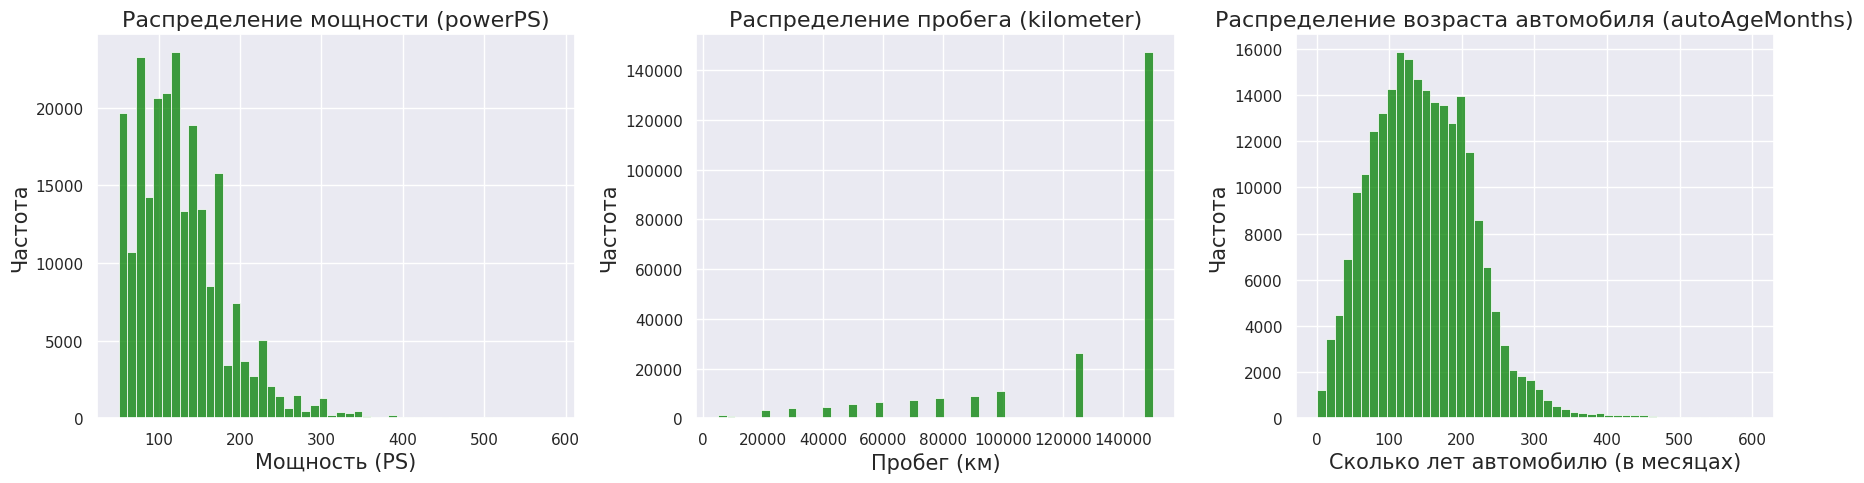

In [17]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(filtered_data['powerPS'], bins=50, color='green')
plt.title('Распределение мощности (powerPS)', fontsize=16)
plt.xlabel('Мощность (PS)', fontsize=15)
plt.ylabel('Частота', fontsize=15)

plt.subplot(1, 3, 2)
sns.histplot(filtered_data['kilometer'], bins=50, color='green')
plt.title('Распределение пробега (kilometer)', fontsize=16)
plt.xlabel('Пробег (км)', fontsize=15)
plt.ylabel('Частота', fontsize=15)

plt.subplot(1, 3, 3)
sns.histplot(filtered_data['autoAgeMonths'], bins=50, color='green')
plt.title('Распределение возраста автомобиля (autoAgeMonths)', fontsize=16)
plt.xlabel('Сколько лет автомобилю (в месяцах)', fontsize=15)
plt.ylabel('Частота', fontsize=15)

plt.tight_layout()
plt.show()


Теперь распределение категориальных признаков

<ipython-input-18-134570987f41>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=feature, ax=axes[i], palette="viridis")
<ipython-input-18-134570987f41>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)
<ipython-input-18-134570987f41>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=feature, ax=axes[i], palette="viridis")
<ipython-input-18-134570987f41>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].se

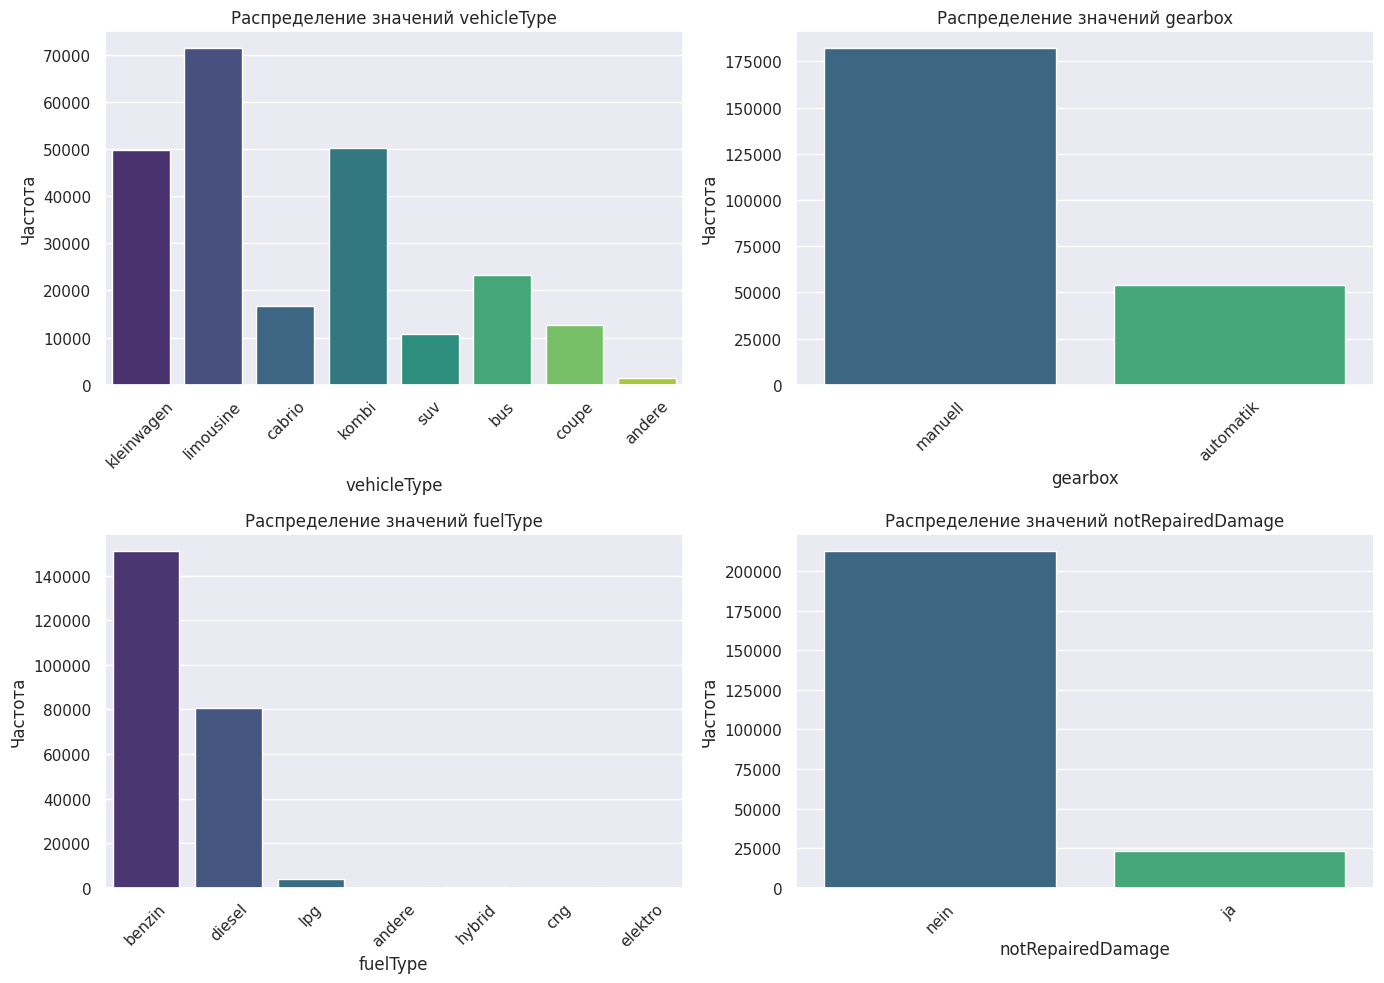

In [18]:
categorical_features = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=filtered_data, x=feature, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Распределение значений {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

Для признаков: бренд и модель построим отдельные гистограммы, так как значений у этих признаков существенно больше, чем у остальных категориальных. В признаке "модель" почти 250 уникальных значений, так что отсортируем их по убыванию количества и выведем топ 30, чтобы не загромождать график.

<ipython-input-19-149d227efd2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='brand', x='count', data=brand_counts, ax=axes[0], palette='viridis')
<ipython-input-19-149d227efd2c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='model', x='count', data=model_counts.head(30), ax=axes[1], palette='viridis')


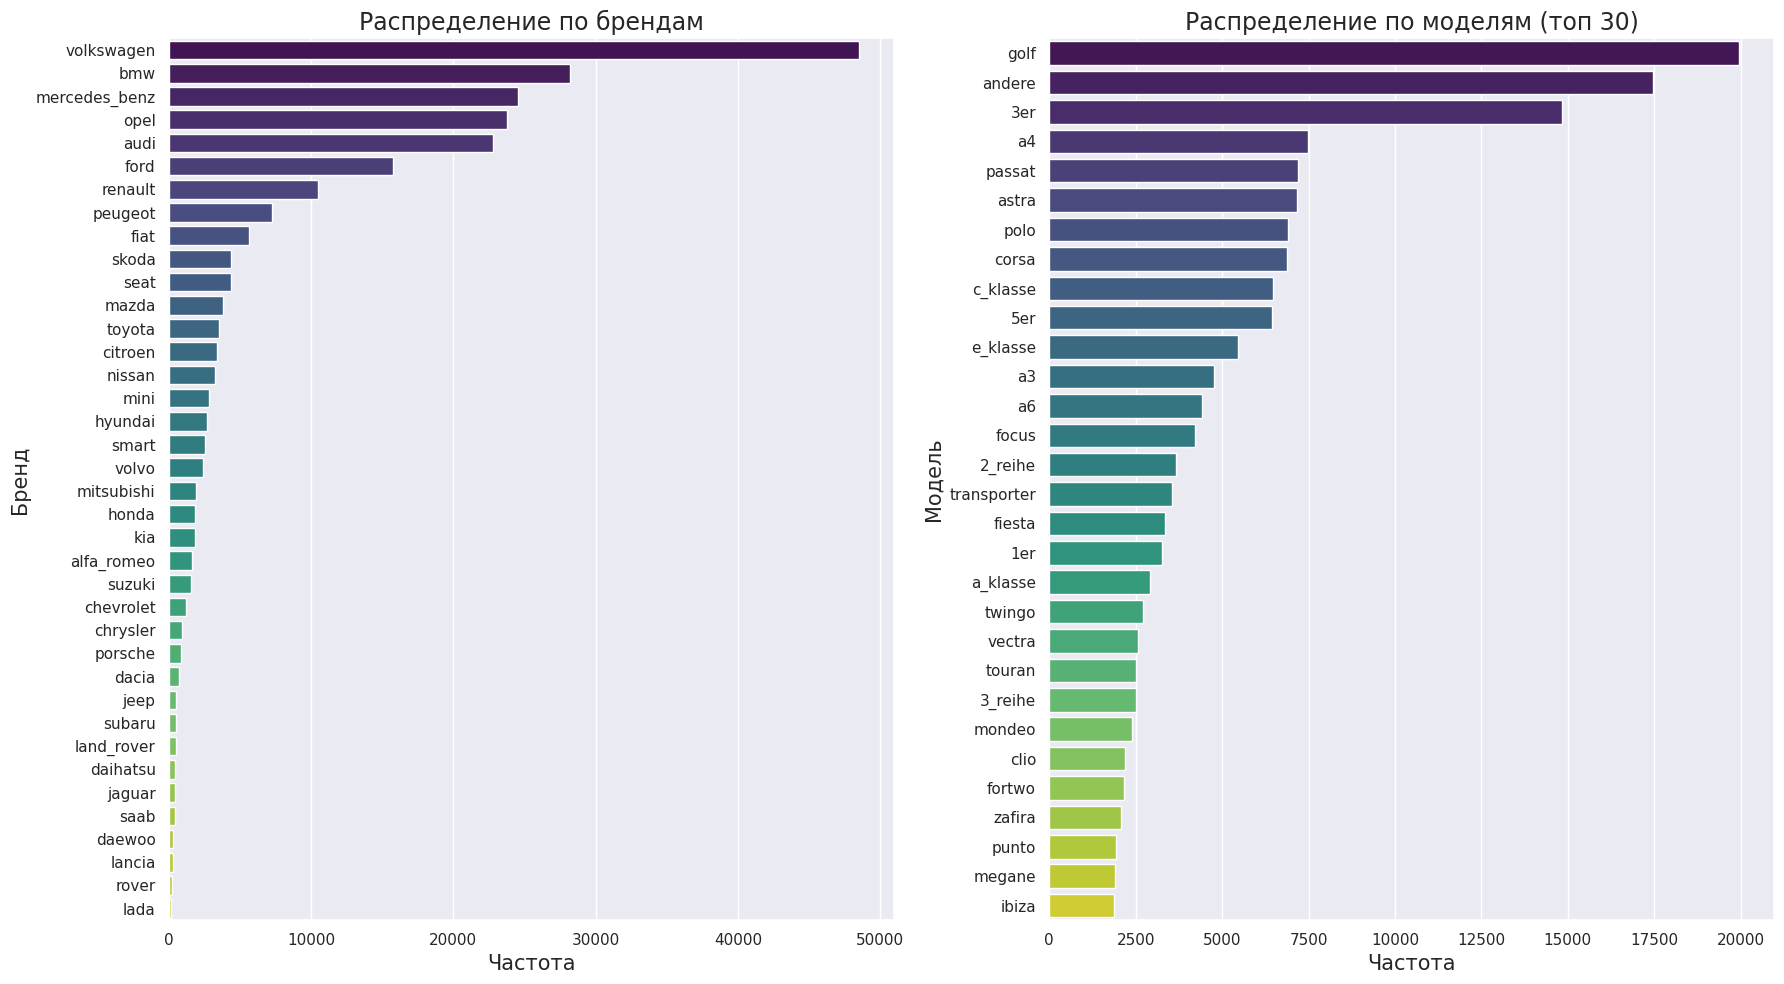

In [19]:
brand_counts = filtered_data['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

model_counts = filtered_data['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.barplot(y='brand', x='count', data=brand_counts, ax=axes[0], palette='viridis')
axes[0].set_title('Распределение по брендам', fontsize=17)
axes[0].set_xlabel('Частота', fontsize=15)
axes[0].set_ylabel('Бренд', fontsize=15)

sns.barplot(y='model', x='count', data=model_counts.head(30), ax=axes[1], palette='viridis')
axes[1].set_title('Распределение по моделям (топ 30)', fontsize=17)
axes[1].set_xlabel('Частота', fontsize=15)
axes[1].set_ylabel('Модель', fontsize=15)

plt.tight_layout()
plt.show()

Теперь построим графики зависисмости логарифмированной цены от различных признаков. Начнем с вещественных

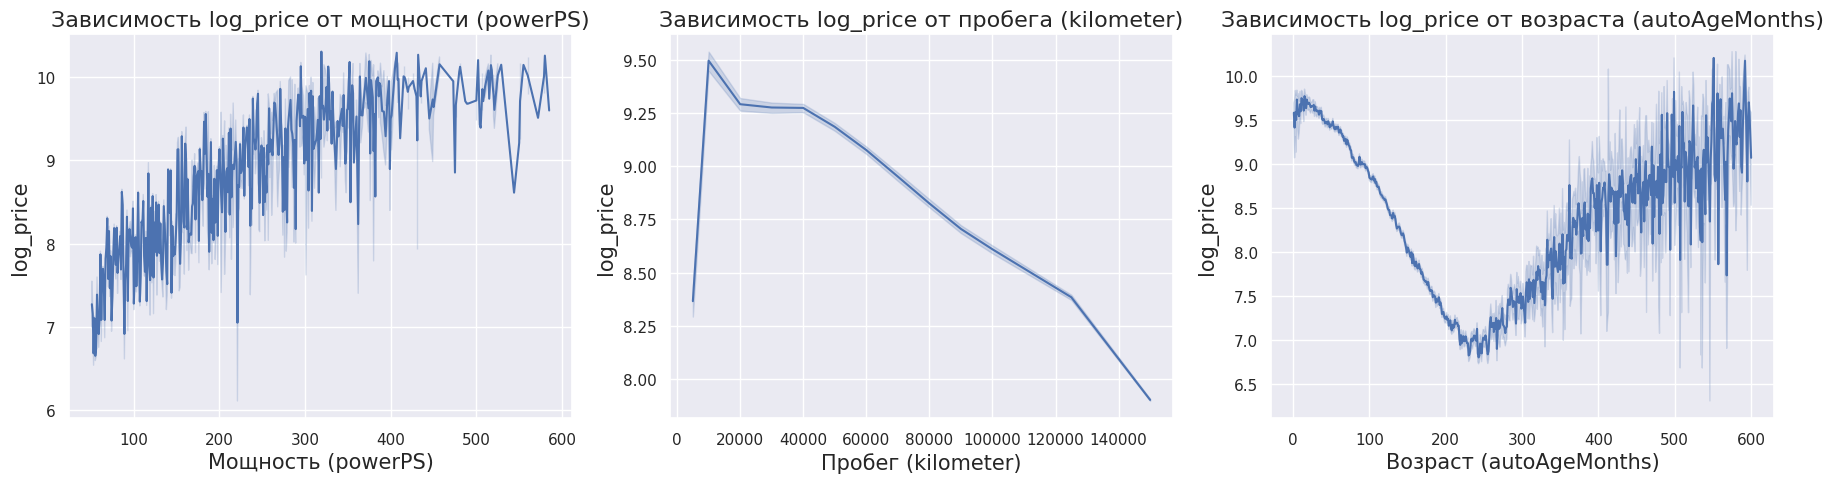

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x='powerPS', y='log_price', data=filtered_data)
plt.title('Зависимость log_price от мощности (powerPS)', fontsize=16)
plt.xlabel('Мощность (powerPS)', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.subplot(1, 3, 2)
sns.lineplot(x='kilometer', y='log_price', data=filtered_data)
plt.title('Зависимость log_price от пробега (kilometer)', fontsize=16)
plt.xlabel('Пробег (kilometer)', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.subplot(1, 3, 3)
sns.lineplot(x='autoAgeMonths', y='log_price', data=filtered_data)
plt.title('Зависимость log_price от возраста (autoAgeMonths)', fontsize=16)
plt.xlabel('Возраст (autoAgeMonths)', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.tight_layout()
plt.show()

На первом графике видим, что, в целом, чем больше мощность машины, тем больше и цена, но все же есть и дорогие машины слабой мощности

На втором графике видим, что с увеличением пробега цена начинает уменьшаться

На третьем графике видно, что при возрасте автомобиля примерно до 20 лет цена автомобиля уменьшается с увеличением возраста. Дальше цена начинается расти с увеличением возраста. Видимо так происходит из-за того, что на продажу выставляются какие-то редкие старинные машины, которые стоят довольно дорого.

Теперь построим графики для категориальных признаков

<ipython-input-21-2606e948c80f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='vehicleType', y='log_price', palette="Set2")
<ipython-input-21-2606e948c80f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='gearbox', y='log_price', palette="Set2")
<ipython-input-21-2606e948c80f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='fuelType', y='log_price', palette="Set2")
<ipython-input-21-2606e948c80f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

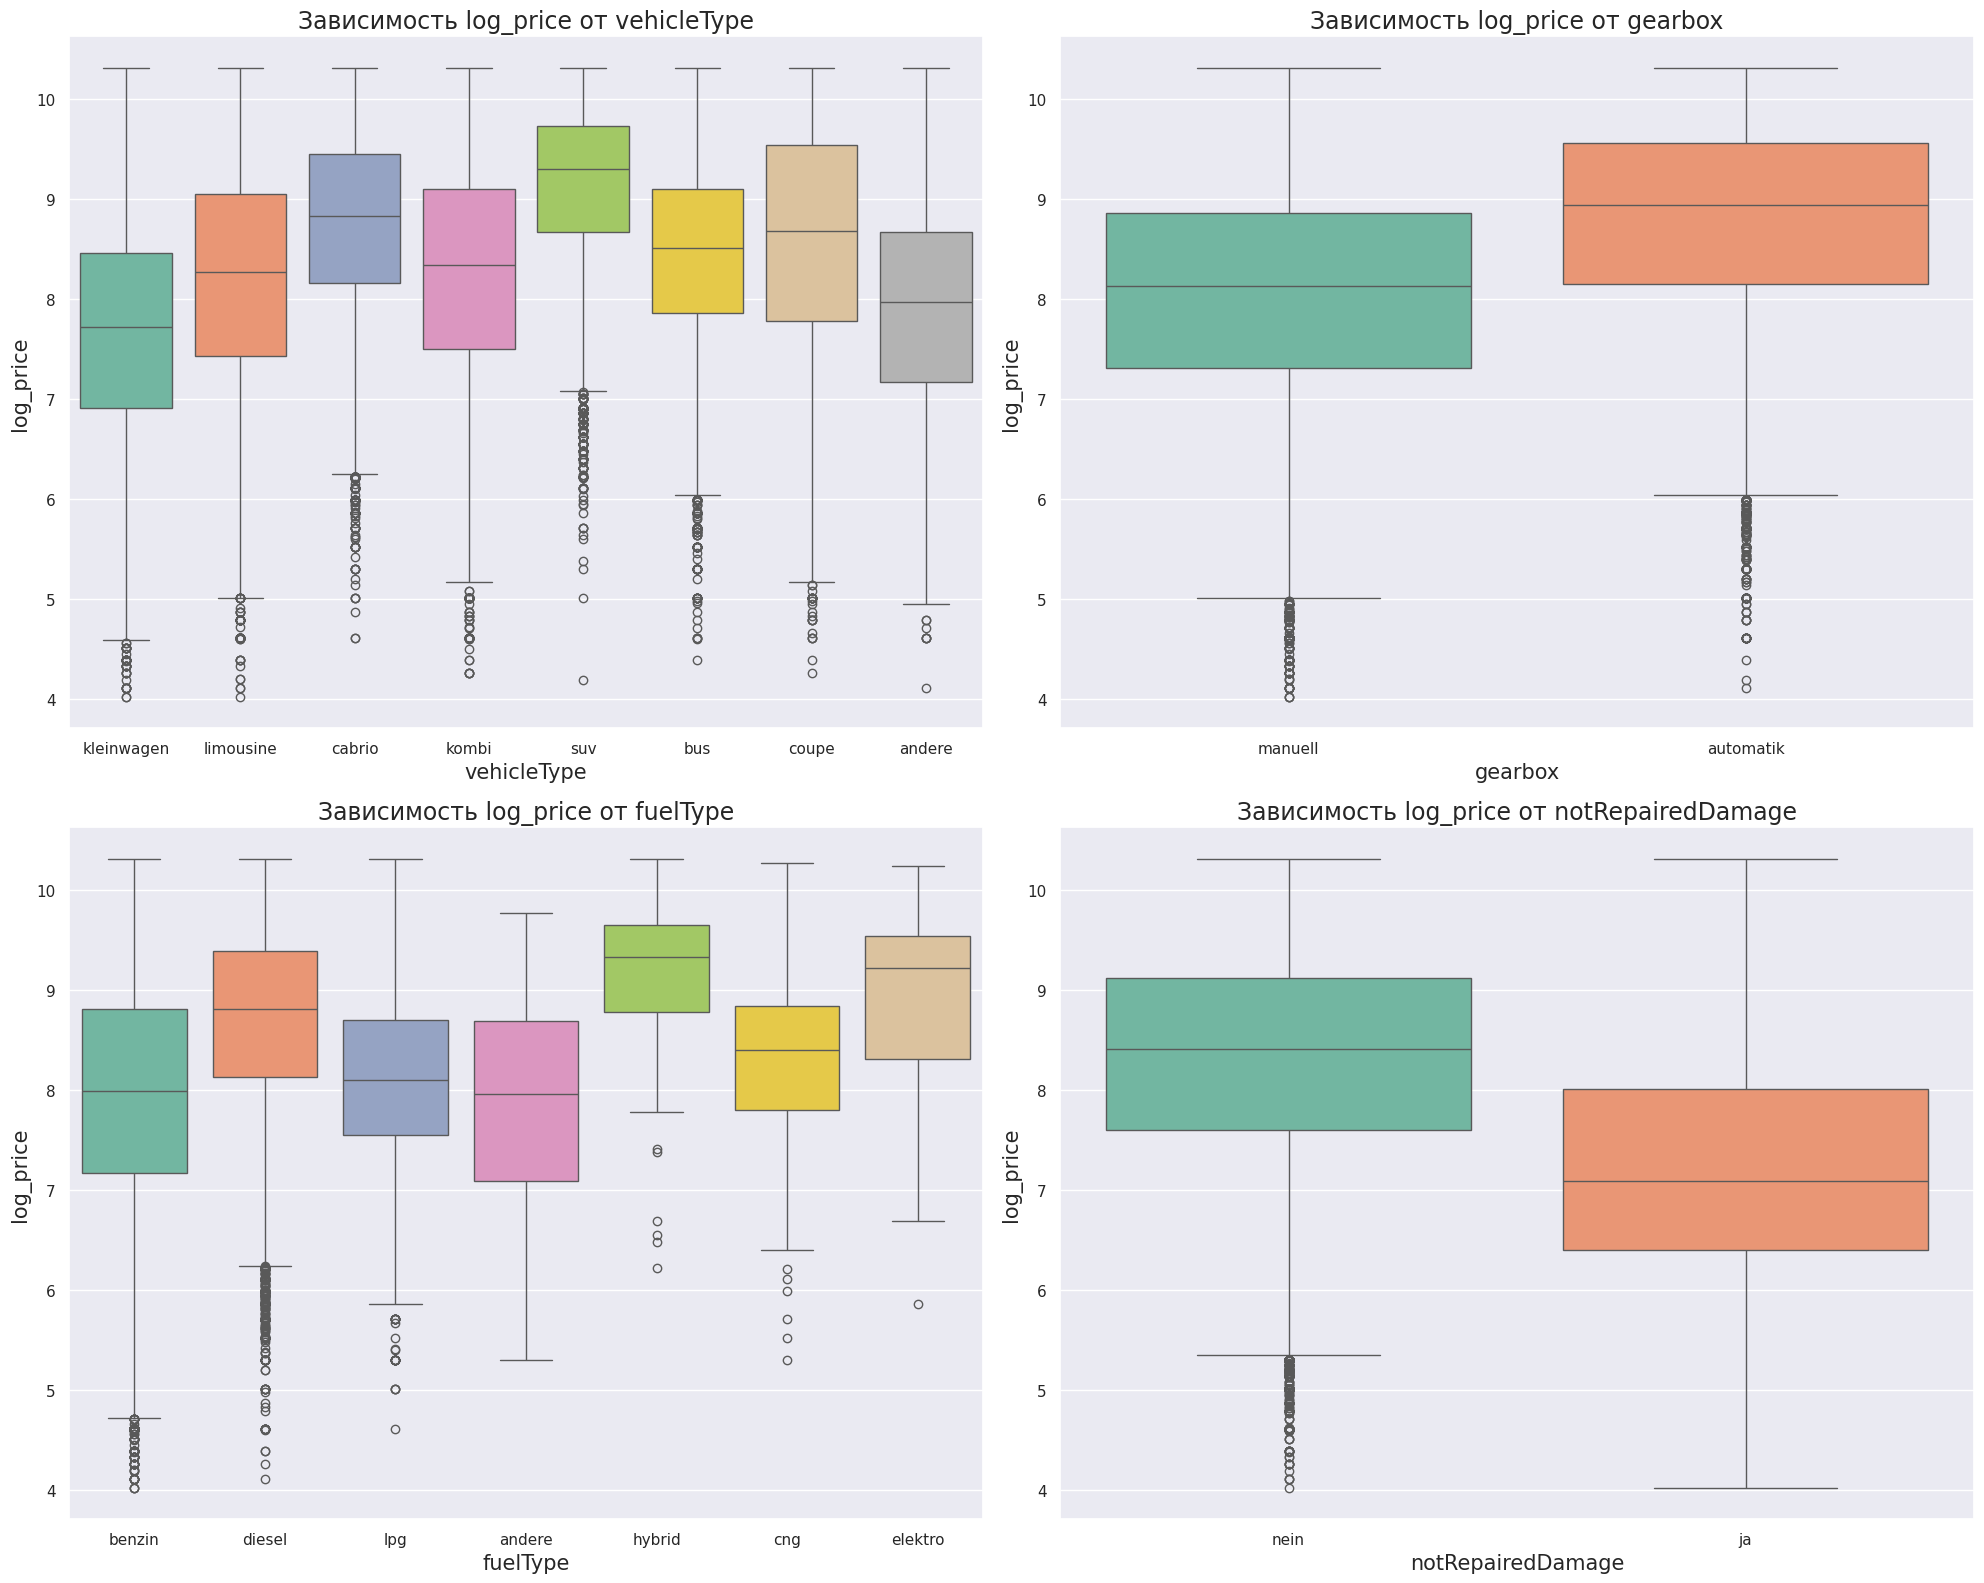

In [21]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sns.boxplot(data=filtered_data, x='vehicleType', y='log_price', palette="Set2")
plt.title('Зависимость log_price от vehicleType', fontsize=17)
plt.xlabel('vehicleType', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.subplot(2, 2, 2)
sns.boxplot(data=filtered_data, x='gearbox', y='log_price', palette="Set2")
plt.title('Зависимость log_price от gearbox', fontsize=17)
plt.xlabel('gearbox', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.subplot(2, 2, 3)
sns.boxplot(data=filtered_data, x='fuelType', y='log_price', palette="Set2")
plt.title('Зависимость log_price от fuelType', fontsize=17)
plt.xlabel('fuelType', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.subplot(2, 2, 4)
sns.boxplot(data=filtered_data, x='notRepairedDamage', y='log_price', palette="Set2")
plt.title('Зависимость log_price от notRepairedDamage', fontsize=17)
plt.xlabel('notRepairedDamage', fontsize=15)
plt.ylabel('log_price', fontsize=15)

plt.tight_layout()
plt.show()

Какие выводы можем сделать по графикам?

На первом графике, видим, что coupe и suv самые дорогие, а самые дешевые - kleinwagen и andere

На втором графике видно, что автоматической коробкой передач машины получаются немного дороже

На третьем графике видно, что электрические и гибридные авто

На четвертом видим, что, как и ожидалось, машины, требующие ремонта, стоят дешевле



Построим отдельно barplot (так будет нагляднее) для признаков: бренд и модель.

<ipython-input-22-ebc8e1940a2e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='log_price', y='brand', estimator=np.mean, palette="Set2", ci=None)
<ipython-input-22-ebc8e1940a2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='log_price', y='brand', estimator=np.mean, palette="Set2", ci=None)


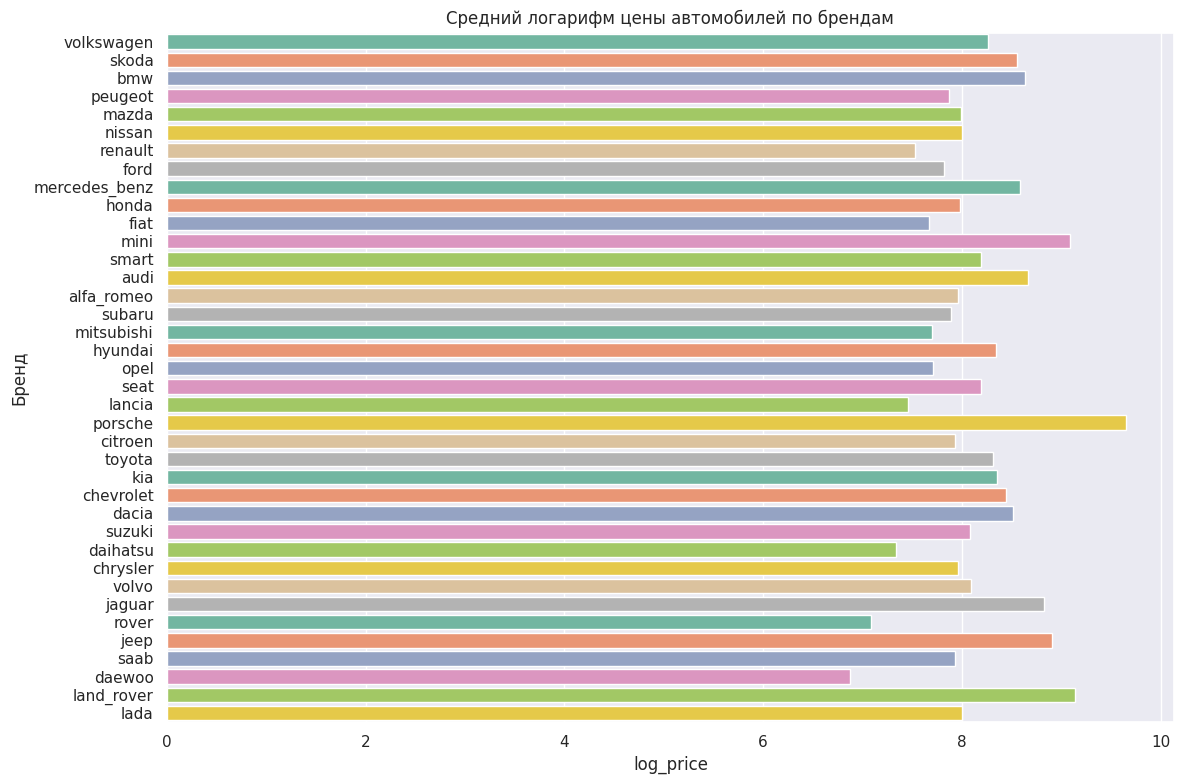

In [22]:
plt.figure(figsize=(12, 8))

sns.barplot(data=filtered_data, x='log_price', y='brand', estimator=np.mean, palette="Set2", ci=None)
plt.title('Средний логарифм цены автомобилей по брендам')
plt.xlabel('log_price')
plt.ylabel('Бренд')

plt.tight_layout()
plt.show()


пыталась построить для модели, но слишком много значений. Марка машины играет значимую роль(видим, что самыми дорогими машинами оказались действительно машины недешевых марок: porche, bmw, land rover и др), а вот модель только немного корректирует цену, так что основной график, на который надо смотреть - это график бренда. Но модель оставим пока в признаках.

Кажется из всех признаков(судя по графикам) только пробег получился не очень подходящим: на графике не особо видна четкая зависимость цены от пробега, в отличие от остальных признаков. Этот признак я уберу

Преобразуем некоторые признаки в бинарные, например gearbox и notRepairedDamage, так как они принимают только 2 значения. Также удалим из возраста автомобиле йавтомобили старше 500 месяцев, чтобы они не мешали при обучении

In [23]:
def convert_gearbox_to_binary(value):
    if value == 'automatik':
        return 1
    return 0

filtered_data['is_auto_gearbox'] = filtered_data['gearbox'].apply(convert_gearbox_to_binary)

filtered_data.drop('gearbox', axis=1, inplace=True)

def convert_repair_to_binary(value):
    if value == 'ja':
        return 1
    return 0

filtered_data['notRepairedDamage'] = filtered_data['notRepairedDamage'].apply(convert_repair_to_binary)

filtered_data = filtered_data[filtered_data['autoAgeMonths'] <= 500]

<ipython-input-23-f8c5fd225310>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_auto_gearbox'] = filtered_data['gearbox'].apply(convert_gearbox_to_binary)
<ipython-input-23-f8c5fd225310>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('gearbox', axis=1, inplace=True)
<ipython-input-23-f8c5fd225310>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [24]:
filtered_data

,brand,model,vehicleType,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,is_auto_gearbox
0,volkswagen,golf,kleinwagen,benzin,0,75,150000,177,1500,7.313887,0
1,skoda,fabia,kleinwagen,diesel,0,69,90000,93,3600,8.188967,0
2,bmw,3er,limousine,benzin,1,102,150000,246,650,6.478510,0
3,peugeot,2_reihe,cabrio,benzin,0,109,150000,140,2200,7.696667,0
4,mazda,3_reihe,limousine,benzin,0,105,150000,136,2000,7.601402,0
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,diesel,0,140,150000,69,7900,8.974745,0
241186,seat,leon,limousine,benzin,1,225,150000,142,3200,8.071219,0
241187,smart,fortwo,cabrio,benzin,0,101,125000,192,1199,7.090077,1
241188,volkswagen,transporter,bus,diesel,0,102,150000,241,9200,9.127067,0


In [25]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'autoAgeMonths']
other = ['is_auto_gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):

In [26]:
x = filtered_data[categorical + numeric + other].copy()
x['bias'] = 1
other += ['bias']
y = filtered_data['log_price']
#y = data['price']
x

,brand,model,vehicleType,fuelType,powerPS,autoAgeMonths,is_auto_gearbox,notRepairedDamage,bias
0,volkswagen,golf,kleinwagen,benzin,75,177,0,0,1
1,skoda,fabia,kleinwagen,diesel,69,93,0,0,1
2,bmw,3er,limousine,benzin,102,246,0,1,1
3,peugeot,2_reihe,cabrio,benzin,109,140,0,0,1
4,mazda,3_reihe,limousine,benzin,105,136,0,0,1
...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,diesel,140,69,0,0,1
241186,seat,leon,limousine,benzin,225,142,0,1,1
241187,smart,fortwo,cabrio,benzin,101,192,1,0,1
241188,volkswagen,transporter,bus,diesel,102,241,0,0,1


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=30)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=30)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegression
lambdas = np.logspace(-5, -0.5, 10)


dimension = x_train.shape[1]

results = pd.DataFrame(columns=['method', 'lambda', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])

In [34]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']
for descent_name in descent_names:
    for l in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': dimension,
                'lambda_': l
            }
        }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(x_train.toarray(), y_train.to_numpy())

        iters_to_conv = regression.descent.lr.iteration

        y_val_pred = regression.predict(x_val.toarray())
        y_train_pred = regression.predict(x_train.toarray())
        y_test_pred = regression.predict(x_test.toarray())

        val_mse = mean_squared_error(y_val, y_val_pred, squared=True)
        train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
        test_mse = mean_squared_error(y_test, y_test_pred, squared=True)

        val_r2 = r2_score(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        d = {
            'method': descent_name,
            'lambda': l,
            'mse_validation': val_mse,
            'mse_train': train_mse,
            'mse_test': test_mse,
            'val_r2': val_r2,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'iters_to_conv': iters_to_conv
        }

        results = pd.concat([results, pd.DataFrame([d])], ignore_index=True)

results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-34-b1a450f70dd4>:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.000010,37.838818,37.600037,37.494145,-31.693907,-31.075677,-31.586761,1
1,full,0.000032,38.485936,38.285598,38.254632,-32.253038,-31.660512,-32.247711,1
2,full,0.000100,24.047381,23.874073,23.851515,-19.777680,-19.366390,-19.729733,1
3,full,0.000316,40.286652,39.994291,39.976413,-33.808912,-33.118157,-33.744139,1
4,full,0.001000,35.151658,35.005238,34.932752,-29.372119,-28.862117,-29.360613,2
5,full,0.003162,28.773333,28.543499,28.453367,-23.861048,-23.349765,-23.729276,20
6,full,0.010000,12.838634,12.714127,12.680733,-10.092976,-9.846112,-10.021028,85
7,full,0.031623,2.116853,2.130851,2.121451,-0.829027,-0.817777,-0.843787,74
8,full,0.100000,0.846789,0.861939,0.856104,0.268348,0.264701,0.255946,41
9,full,0.316228,0.508382,0.518741,0.514512,0.560742,0.557475,0.552829,54


Найдем оптимальную длину шага для каждого метода

In [36]:
best_results = results.loc[results.groupby('method')['mse_validation'].idxmin()]

best_results

,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
39,adam,0.316228,0.266378,0.268245,0.267980,0.769841,0.771167,0.767094,225
9,full,0.316228,0.508382,0.518741,0.514512,0.560742,0.557475,0.552829,54
29,momentum,0.316228,0.314506,0.319348,0.318235,0.728257,0.727572,0.723417,100
19,stochastic,0.316228,0.459353,0.467184,0.458823,0.603105,0.601456,0.601229,119


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

<ipython-input-41-e2c6ebb1a71c>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iteration_data = pd.concat([iteration_data, method_iteration_data], ignore_index=True)


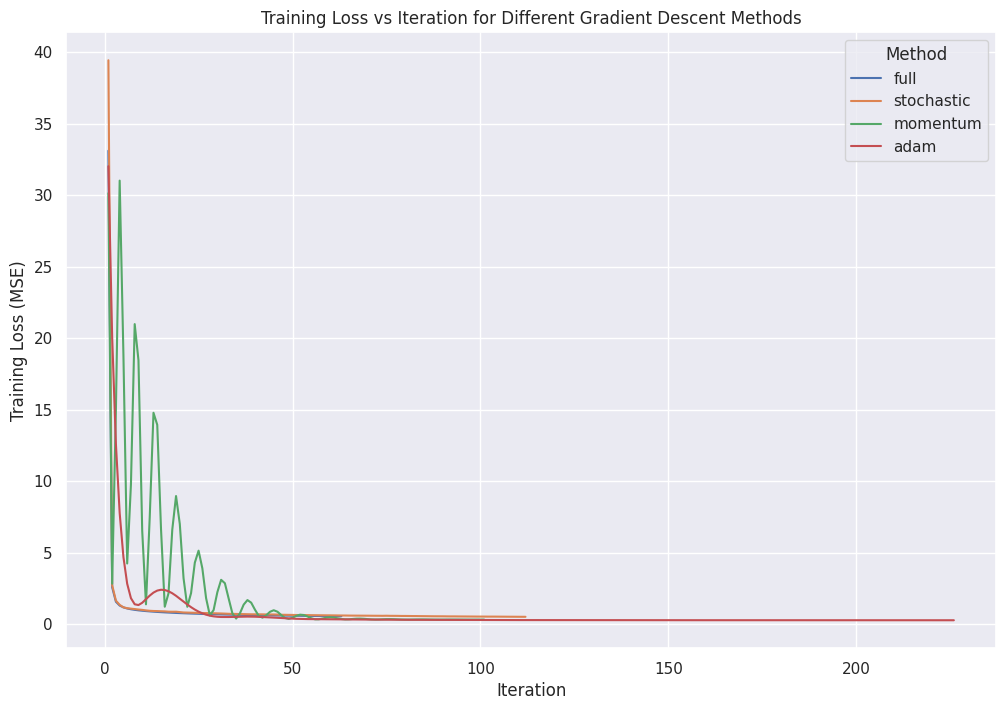

In [41]:
dimension = x_train.shape[1]
lambdas = [0.316228]
descent_names = ['full', 'stochastic', 'momentum', 'adam']

iteration_data = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in descent_names:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambdas[0]
        }
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train.toarray(), y_train.to_numpy())

    method_iteration_data = pd.DataFrame({
        'method': descent_name,
        'iter': np.arange(1, len(regression.loss_history) + 1),
        'loss_on_iter': regression.loss_history
    })

    iteration_data = pd.concat([iteration_data, method_iteration_data], ignore_index=True)

plt.figure(figsize=(12, 8))
for descent_name in descent_names:
    method_data = iteration_data[iteration_data['method'] == descent_name]
    plt.plot(method_data['iter'], method_data['loss_on_iter'], label=descent_name)

plt.xlabel('Iteration')
plt.ylabel('Training Loss (MSE)')
plt.title('Зависимость ошибки от номера итерации')
plt.legend(title='Method')
plt.grid(True)
plt.show()

Видим, что Full Gradient Descent продемонстрировал самую быструю сходимость к ближайшему минимуму. Однако, поскольку он нашёл ближайший локальный минимум, у него остался относительно высокий уровень ошибки, а значение
метрики качества не очень высокое по сравнению с методами adam и momentum. Это указывает на то, что, хотя сходимость была быстрой, качество решения могло быть ограничено из-за попадания в локальный минимум.

Метод стохастического градиентного спуска показал нестабильное поведение с большим количеством итераций до сходимости. Этот метод может быть эффективен в некоторых случаях, но здесь не уверена, что его уместно применять.

Метод momentum показал хорошую способность к поиску глобального минимума за счёт своей особенности «проскальзывать» локальные минимумы. На графике видно, что метод достиг минимума более уверенно, чем full, с низким уровнем ошибки и хорошим значением метрики качества.

Метод adam продемонстрировал очень быструю сходимость, подходя к минимуму с высокой скоростью. Но, как видно из графика, после приближения к минимуму он всё же некоторое время колеблется вокруг него, но в итоге он всё же находит хорошее решение.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [42]:
import time

In [43]:
batch_sizes = np.arange(5, 500, 10)
k = 10
mean_times = []
mean_iterations = []

In [44]:
for batch_size in batch_sizes:
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x_train.shape[1],
            'lambda_': 0.316228,
            'batch_size': batch_size
        }
    }

    times = []
    iterations = []

    for _ in range(k):

        regression = LinearRegression(descent_config=descent_config)
        start_time = time.perf_counter()
        regression.fit(x_train.toarray(), y_train.to_numpy())
        end_time = time.perf_counter()
        times.append(end_time - start_time)
        iterations.append(len(regression.loss_history))

    mean_times.append(np.mean(times))
    mean_iterations.append(np.mean(iterations))

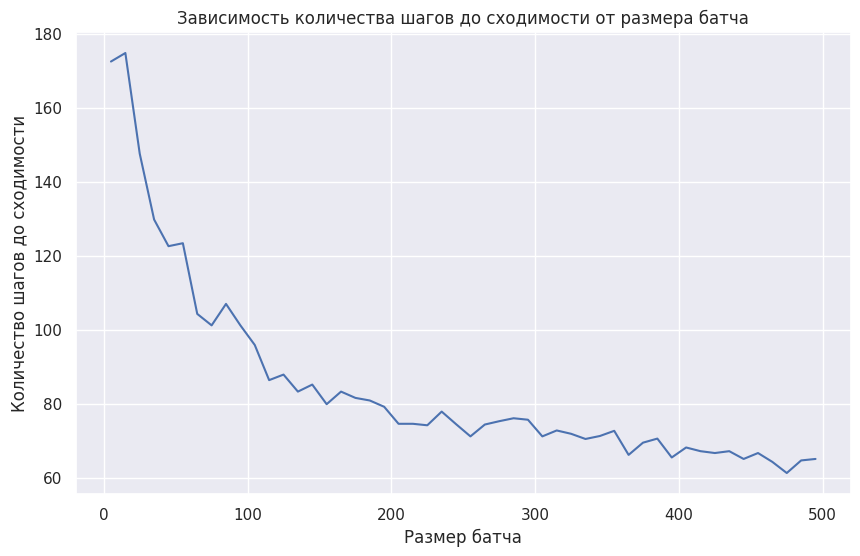

In [47]:
results_df = pd.DataFrame({
    'Размер батча': batch_sizes,
    'Количество шагов до сходимости': mean_iterations
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Размер батча', y='Количество шагов до сходимости')
plt.xlabel('Размер батча')
plt.ylabel('Количество шагов до сходимости')
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.grid(True)
plt.show()

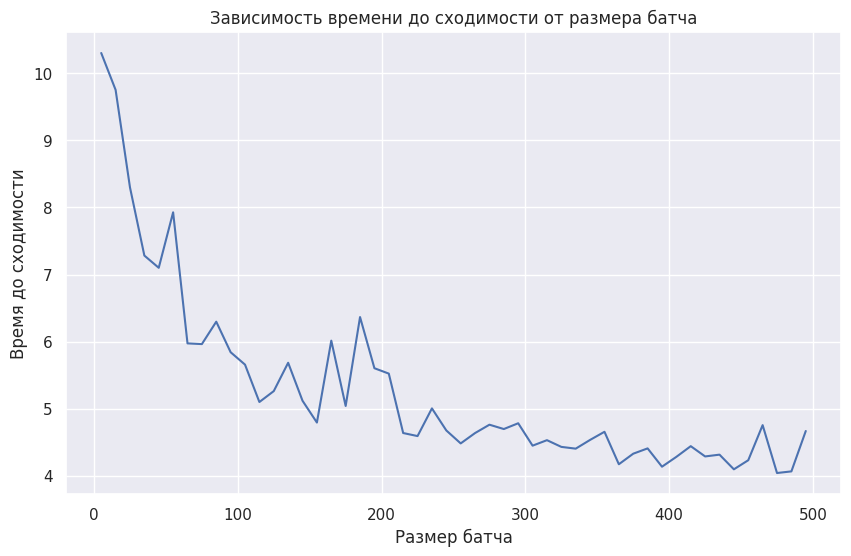

In [49]:
results_df = pd.DataFrame({
    'Размер батча': batch_sizes,
    'Время до сходимости': mean_times
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Размер батча', y='Время до сходимости')
plt.xlabel('Размер батча')
plt.ylabel('Время до сходимости')
plt.title('Зависимость времени до сходимости от размера батча')
plt.grid(True)
plt.show()

Время, что время и количество итераций обратно пропорционально размеру батча, так как мы уменьшаем шаг при росте размера батча, а значит вероятность проскочить локальный минимум ниже.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Недавно я приготовила Наполеон

Вот рецепт:

Крем 1:
В малкенькую кастрюлю разбить два яйца и добавить две столовые ложки муки.
Налить пол стакана молока и перемешать венчиком, чтобы не было комочков, после этого долить еще пол стакана молока.
Добавить стакан сахара и перемешать еще раз, включить огонь.
Добавить ванилин, помешивать пока не загустеет немного
Поставить на средний огонь и помешивать до кипения
Как закипит, убрать огонь, немного остудить, закрыть пленкой крем прямо в ковшике и оставить остывать
Когда остынет, взбить с небольшим количеством масла в миксере.

Крем 2:
Нужен миксер или комбайн, где можно взбить
Положить в него 3/4 пачки масла 200 г
Добавить 200 г сгущенки
Взбивать, пока по консистенции не будет как масло
Поставить в холодильник, немного остудить.

Тесто:
Духовку разогреть на 180 градусов
Каждый корж раскатать по размеру формы и вырезать по форме
Положить корж на противень с пергаментом, остатки от обрезанного коржа положить рядом (они нужны для посыпки)
Сделать ножом надрезы на коржах и запечь минут 5-7 в духовке
Так повторить для 6 коржей.

Торт:
Сверху на коржи поочередно намазывать первый и второй крем и выкладывать друг на друга.
Самый верхний слой намазать первым заварным кремом.
Остатки коржей руками или скалкой измельчить в крошку, и сделать посыпку для торта.

Дать торту постоять где-то часов 8
Еще часов 5-8 дать постоять в холодильнике и можно есть:)

Вот что получилось: 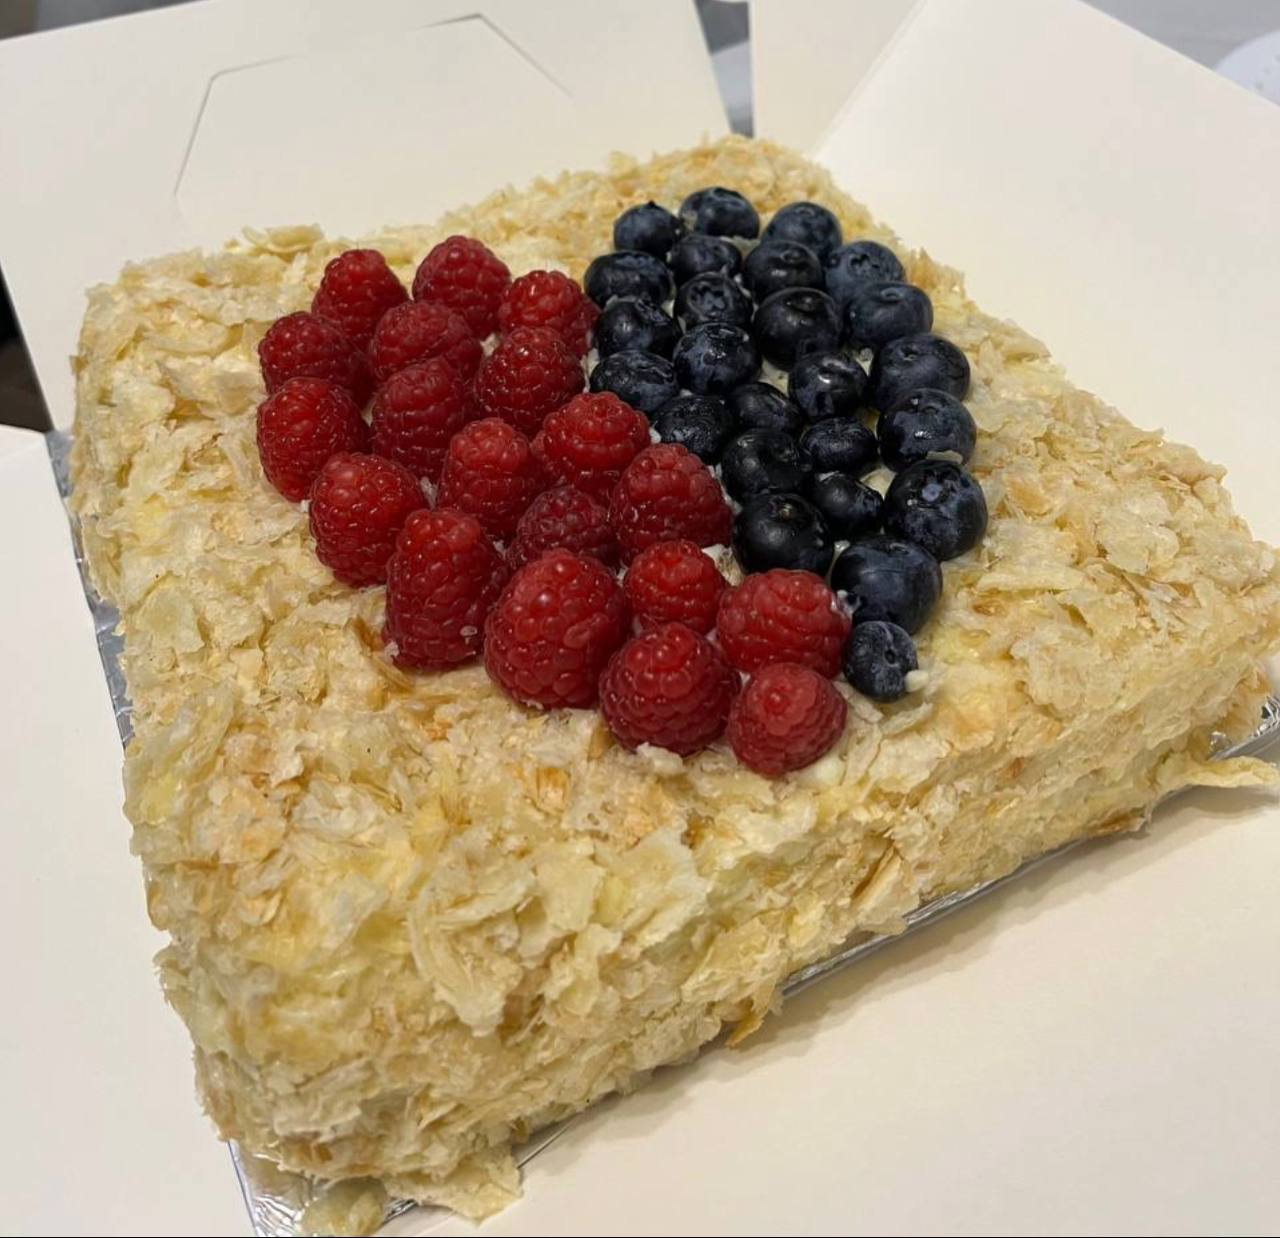

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: